# Kalman Filter for Trajectory data Filtering
### Tutorial by : Mahmoud Abdelrahman (Ouf)

arch.mahmoud.ouf111@gmail.com

for more resources : 
https://www.youtube.com/playlist?list=PLX2gX-ftPVXU3oUFNATxGXY90AULiqnWT

# requirements

```
numpy
pandas
matplotlib
```

On linux, make sure to have **imagemagick** installed

`sudo apt-get install imagemagick`

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import random
from IPython.display import Image

%matplotlib inline

# First lets generate some data that represents a trajectory. 
The data will be two dimensional data [x, y], where $x$ is the longitude, and $y$ is the latitude. $x &y$ are the ground truth values. Those data are standard ranomized by $\mu = 0$ $\sigma = 1.0$

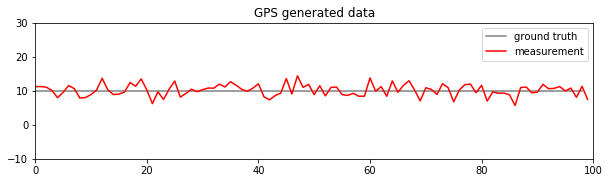

In [2]:
# This code is used to generate a gif image of gps data points.
fig, ax = plt.subplots(1, 1, figsize=(10, 2.5))
xs = []
ys = []
errorsX = []
errorsY = []

for i in range(100):
    plt.cla()
    randomx = random.normalvariate(0, 2.0)
    randomy = random.normalvariate(0, 2.0)
    errorsX.append(randomx)
    errorsY.append(randomy)
    xs.append(i)
    ys.append(10+randomy)
    ax.set_ylim([-10., 30.0])
    ax.set_xlim([0., 100.])
    d2 = ax.plot(range(i), [10]*i,color="black", alpha=0.5, label="ground truth")
    d = ax.plot(xs, ys, color="red",label="measurement")
    ax.set_title("GPS generated data")
    plt.legend()
    fig.savefig("im/Kal_" + str(i).zfill(3)+".jpg")
# plt.close()
!convert -loop 0 im/*.jpg im/00_init_randomized_trajectory.gif
!rm -r im/*.jpg

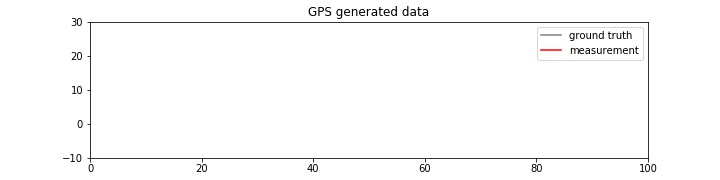

In [3]:
im1 = Image("im/00_init_randomized_trajectory.gif")
display(im1)

![](im/00_init_randomized_trajectory.gif)

![](im/00_init_randomized_trajectory.gif)

### Now, lets start thinking about Kalman Filter basics in the following 3 equations:
#### 1. Kalman Gain
$$ KG = \frac{E_{EST}}{E_{EST} + E_{MEA}} $$
#### 2. Current Estimate
$$ EST_t  = EST_{t-1} + KG [MEA - EST_{t-1}]$$
#### 3. Current Error Estimate
$$ E_{EST_{t}} = \frac{(E_{MEA})(E_{EST_{t-1}})}{(E_{MEA}) + (E_{EST_{t-1}})} $$

In [4]:
# 1. Kalman Gain
def kalmanGain(errorEst, error_measurement):
    return errorEst / ( errorEst + error_measurement )

# 2. Current Estimate
def currentEst(previous_estimate, kalman_gain, measurement):
    return previous_estimate + kalman_gain *(measurement - previous_estimate)

# 3. Current Error Estimate
def currentErrorEstimate (error_measurement, previous_error_estimate):
    return (error_measurement * previous_error_estimate)/(error_measurement + previous_error_estimate)

### Now, lets loop over all the measured points in the trajecotry alongside with the error values of each point, and then calculted the kalman filter estimation

In [5]:
#initial random value of the previous estimate. 
previous_estimte = 20.0

# initial previous error estmiate, try to set it large value. 
previous_error_estimate = 10.0

kys = [20.0] # new Kalman x values will be appended here. 
errorEst = [10.0]

# This loop claculate Kalman gain , current estmiate and the current estimate error,
# then input those values into the following step ... 
for i in range(len(xs)):
    kG = kalmanGain(previous_error_estimate, 2.0)
    estT = currentEst(previous_estimte, kG, ys[i])
    eEstT = currentErrorEstimate(2.0, previous_error_estimate)
    kys.append(estT)
    errorEst.append(eEstT)
    previous_estimte = estT
    previous_error_estimate = eEstT


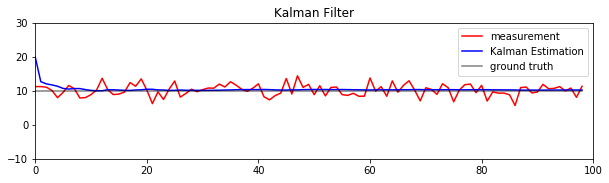

In [6]:
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 2.5))
for i in range(100):
    plt.cla()
    ax2.set_ylim([-10., 30.])
    ax2.set_xlim([0., 100.])
    d0 = ax2.plot(xs[:i], ys[:i], color="red", label = "measurement")
    d = ax2.plot(range(i), kys[:i], color="blue", label = "Kalman Estimation")
    d2 = ax2.plot(range(i), [10]*i,color="black", alpha=0.5, label="ground truth")
    ax2.set_title("Kalman Filter")
    plt.legend()
    fig2.savefig("im/Kal_" + str(i).zfill(3)+".jpg")
# plt.close()
!convert -loop 0 im/*.jpg im/01_Kalman.gif
!rm -r im/*.jpg


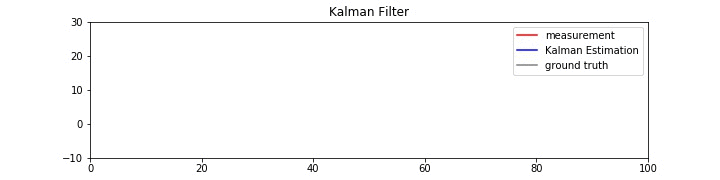

In [7]:
im2 = Image("im/01_Kalman.gif")
display(im2)

![](im/01_Kalman.gif)

![](im/01_Kalman.gif)

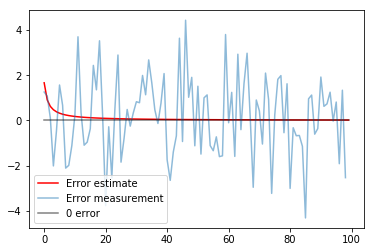

In [8]:
zeros = [0]*len(errorEst)
plt.plot(errorEst[1:], label="Error estimate", color="red")
plt.plot(errorsY[1:], label="Error measurement", alpha=0.5)
plt.plot(zeros[1:], label="0 error", color="black", alpha=0.5)
plt.legend()